In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [8]:
data=pd.read_csv("C:\\Users\\swarn\\Downloads\\data_science_salaries.csv")

In [9]:
data.isnull().sum()

job_title             0
experience_level      0
employment_type       0
work_models           0
work_year             0
employee_residence    0
salary                0
salary_currency       0
salary_in_usd         0
company_location      0
company_size          0
dtype: int64

In [6]:
data[data.duplicated()]

,job_title,experience_level,employment_type,work_models,work_year,employee_residence,salary,salary_currency,salary_in_usd,company_location,company_size


In [175]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6599 entries, 0 to 6598
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   job_title           6599 non-null   object        
 1   experience_level    6599 non-null   object        
 2   employment_type     6599 non-null   object        
 3   work_models         6599 non-null   object        
 4   work_year           6599 non-null   datetime64[ns]
 5   employee_residence  6599 non-null   object        
 6   salary              6599 non-null   int64         
 7   salary_currency     6599 non-null   object        
 8   salary_in_usd       6599 non-null   int64         
 9   company_location    6599 non-null   object        
 10  company_size        6599 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(8)
memory usage: 567.2+ KB


In [8]:
data.shape

(6599, 11)

# 1: Average salaries of experience levels for each job titles in USD

In [127]:
data.groupby(["job_title","experience_level"])["salary_in_usd"].mean()

job_title                        experience_level
AI Architect                     Executive-level     215936.000000
                                 Senior-level        233850.000000
AI Developer                     Entry-level         110119.500000
                                 Mid-level           138294.333333
                                 Senior-level        162770.666667
                                                         ...      
Staff Data Analyst               Entry-level          44753.000000
                                 Executive-level      15000.000000
                                 Mid-level           179998.000000
Staff Data Scientist             Senior-level        134500.000000
Staff Machine Learning Engineer  Senior-level        185000.000000
Name: salary_in_usd, Length: 279, dtype: float64

# 2: Average salaries of each job titles in USD

In [132]:
data.groupby("job_title").salary_in_usd.mean()

job_title
AI Architect                       232058.600000
AI Developer                       141140.888889
AI Engineer                        162616.250000
AI Product Manager                 120000.000000
AI Programmer                       67382.333333
                                       ...      
Sales Data Analyst                  60000.000000
Software Data Engineer             111627.666667
Staff Data Analyst                  79917.000000
Staff Data Scientist               134500.000000
Staff Machine Learning Engineer    185000.000000
Name: salary_in_usd, Length: 132, dtype: float64

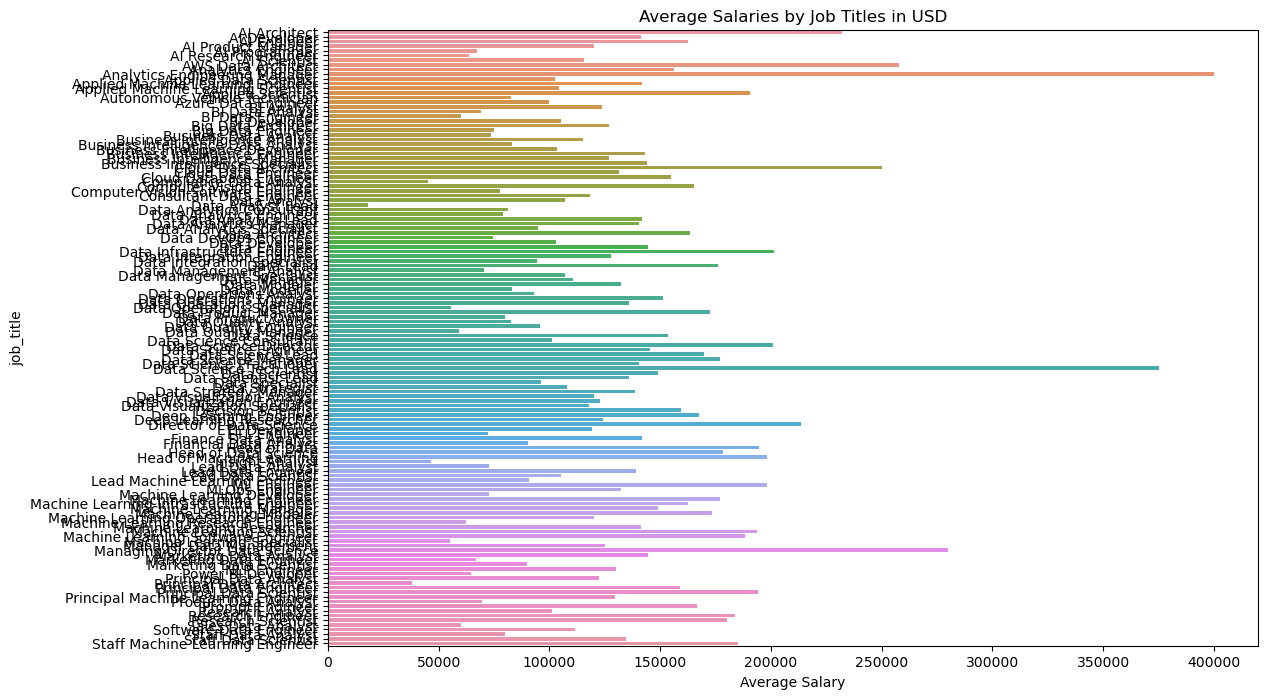

In [142]:
plt.figure(figsize=(12,8))
plt.title('Average Salaries by Job Titles in USD')
plt.xlabel('Average Salary')
plt.ylabel('Job Title')
data1=data.groupby("job_title").salary_in_usd.mean()
sns.barplot(x=data1.values,y=data1.index)
plt.show()

# 3: Average salaries of experience levels in USD

In [63]:
data.groupby("experience_level").salary_in_usd.mean().sort_values(ascending=False)

experience_level
Executive-level    189687.346457
Senior-level       162071.063581
Mid-level          119019.812537
Entry-level         84448.916814
Name: salary_in_usd, dtype: float64

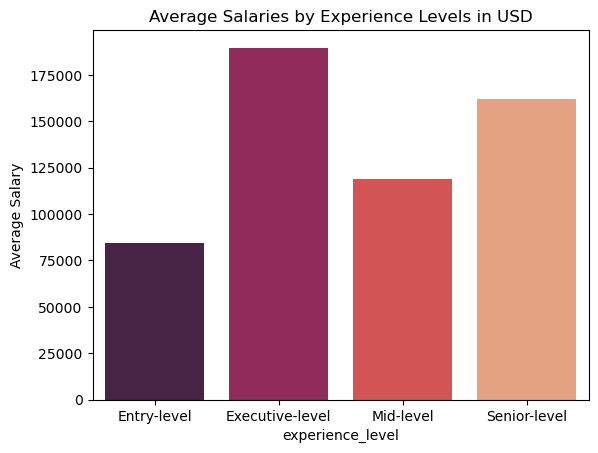

In [143]:
plt.title('Average Salaries by Experience Levels in USD')
plt.xlabel('Experience Level')
plt.ylabel('Average Salary')
data1=data.groupby("experience_level").salary_in_usd.mean()
sns.barplot(x=data1.index,y=data1.values,palette="rocket")
plt.show()

# 4: Average salaries of work models in USD

In [62]:
data.groupby("work_models").salary_in_usd.mean().sort_values(ascending=False)

work_models
On-site    152600.100970
Remote     140550.137837
Hybrid      83293.502222
Name: salary_in_usd, dtype: float64

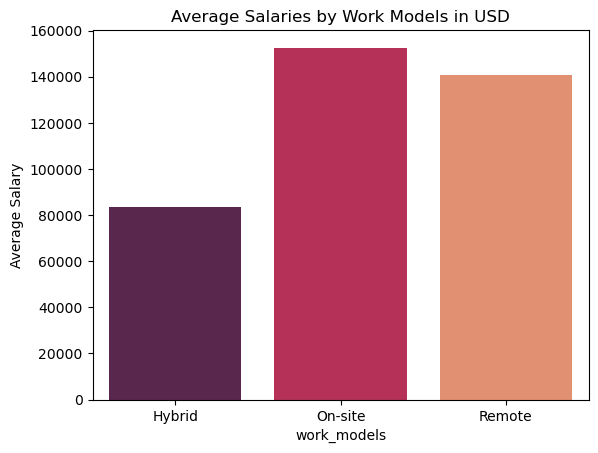

In [144]:
plt.title('Average Salaries by Work Models in USD')
plt.xlabel('Work Model')
plt.ylabel('Average Salary')
data1=data.groupby("work_models").salary_in_usd.mean()
sns.barplot(x=data1.index,y=data1.values,palette="rocket")
plt.show()

# 4: Top 5 popular job titles of Data science in the world

In [194]:
data.job_title.value_counts().head(5)

Data Engineer                1307
Data Scientist               1243
Data Analyst                  910
Machine Learning Engineer     629
Analytics Engineer            246
Name: job_title, dtype: int64

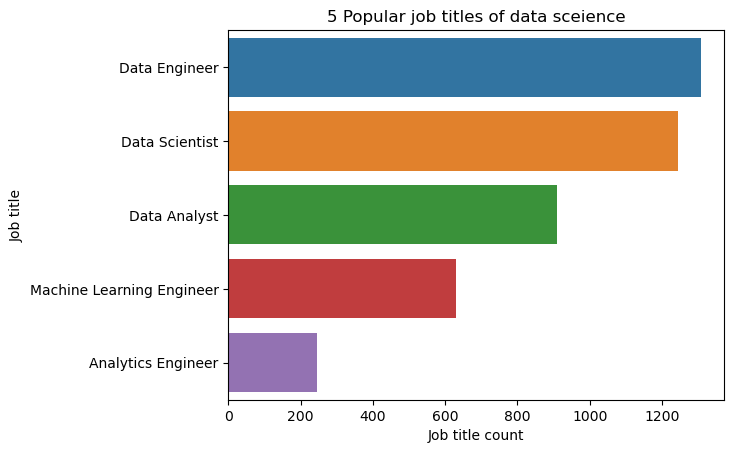

In [222]:
plt.title("5 Popular job titles of data sceience")
plt.xlabel("Job title count")
plt.ylabel("Job title")
data1=data.job_title.value_counts().head(5)
sns.barplot(x=data1.values,y=data1.index)
plt.show()

# 5: Top 5 and Bottom 5 average salaries by job titles in USD

In [209]:
data1=data.groupby("job_title").salary_in_usd.mean().sort_values(ascending=False).head(5)
data1

job_title
Analytics Engineering Manager     399880.0
Data Science Tech Lead            375000.0
Managing Director Data Science    280000.0
AWS Data Architect                258000.0
Cloud Data Architect              250000.0
Name: salary_in_usd, dtype: float64

In [210]:
data2=data.groupby("job_title").salary_in_usd.mean().sort_values(ascending=True).head(5)
data2

job_title
Data Analyst Lead              18000.000000
Principal Data Architect       38154.000000
Compliance Data Analyst        45000.000000
Insight Analyst                46339.833333
Machine Learning Specialist    55000.000000
Name: salary_in_usd, dtype: float64

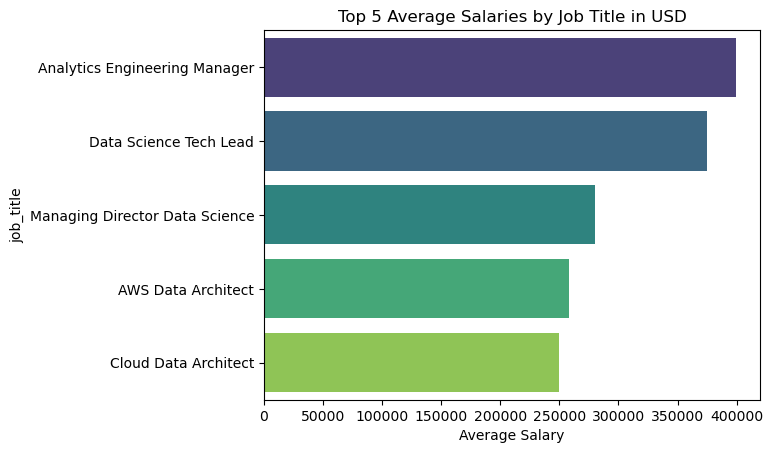

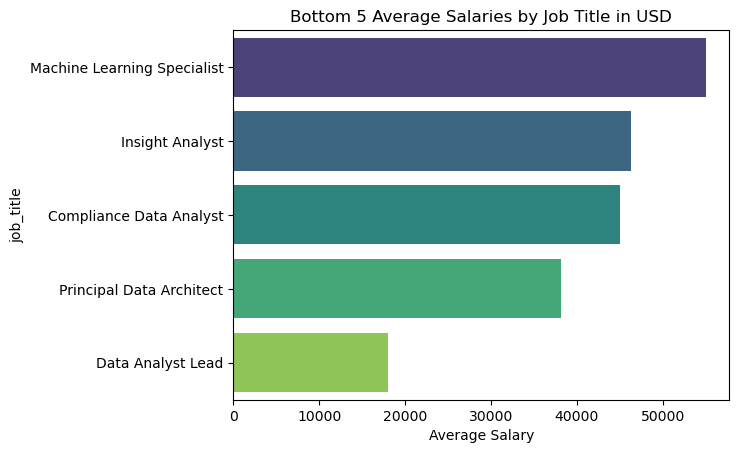

In [211]:
plt.title('Top 5 Average Salaries by Job Title in USD')
plt.xlabel('Average Salary')
plt.ylabel('Job Title')
data1=data.groupby("job_title").salary_in_usd.mean().sort_values(ascending=False).head(5)
sns.barplot(x=data1.values,y=data1.index,palette='viridis')
plt.show()
plt.title('Bottom 5 Average Salaries by Job Title in USD')
plt.xlabel('Average Salary')
plt.ylabel('Job Title')
data2=data.groupby("job_title").salary_in_usd.mean().sort_values(ascending=False).tail(5)
sns.barplot(x=data2.values,y=data2.index,palette='viridis')
plt.show()

# 6: Average salaries by employment type in USD

In [149]:
data.groupby("employment_type").salary_in_usd.mean().sort_values(ascending=False)

employment_type
Full-time    146034.998932
Contract     117109.368421
Part-time     55291.062500
Freelance     51923.166667
Name: salary_in_usd, dtype: float64

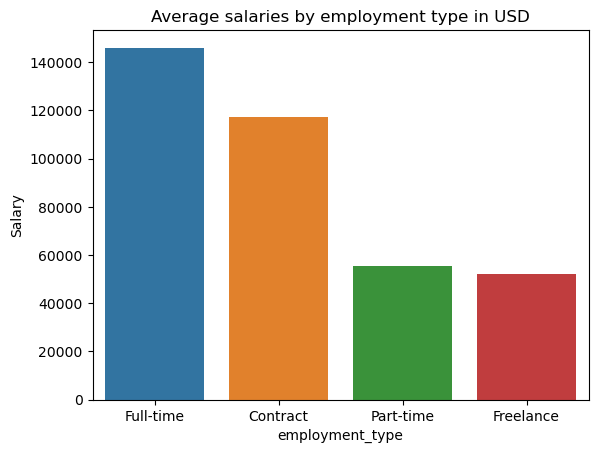

In [217]:
plt.title("Average salaries by employment type in USD")
plt.xlabel("Employment type")
plt.ylabel("Salary")
data1=data.groupby("employment_type").salary_in_usd.mean().sort_values(ascending=False)
sns.barplot(x=data1.index,y=data1.values)
plt.show()

# 7: Percentage distribution of Employment type

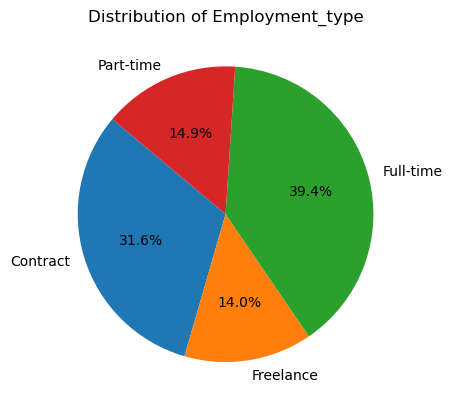

In [203]:
data1=data.groupby("employment_type").salary_in_usd.mean()
plt.pie(data1,labels=data1.index, autopct='%1.1f%%', startangle=140)
plt.title("Distribution of Employment_type")
plt.show()

# 8: Top 10 Average salaries of employee residence in USD

In [154]:
data.groupby("employee_residence").salary_in_usd.mean().sort_values(ascending=False).head(10)

employee_residence
Israel                    417937.000000
Qatar                     300000.000000
Malaysia                  200000.000000
Puerto Rico               166000.000000
United States             157780.939680
New Zealand               151634.333333
Canada                    140564.883817
Saudi Arabia              134999.000000
China                     125404.000000
Bosnia and Herzegovina    120000.000000
Name: salary_in_usd, dtype: float64

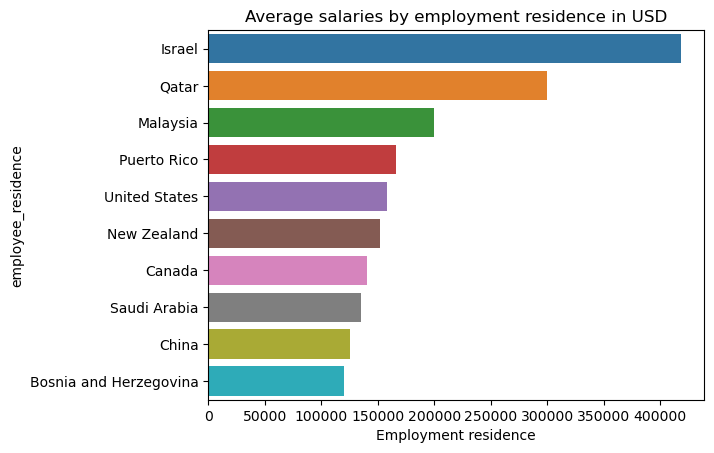

In [216]:
plt.title("Average salaries by employment residence in USD")
plt.xlabel("Employee residence")
plt.ylabel("Salary")
data1=data.groupby("employee_residence").salary_in_usd.mean().sort_values(ascending=False).head(10)
sns.barplot(x=data1.values,y=data1.index)
plt.show()

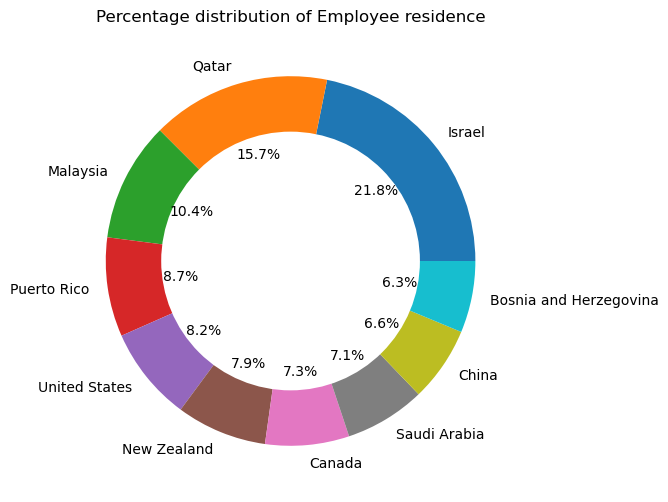

In [155]:
plt.figure(figsize=(12,6))
data1=data.groupby("employee_residence").salary_in_usd.mean().sort_values(ascending=False).head(10)
plt.pie(data1,labels=data1.index,autopct="%0.1f%%",radius=1)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title("Percentage distribution of Employee residence")
plt.show()

# 9: Average salaries of company size in USD

In [156]:
data.groupby("company_size").salary_in_usd.mean().sort_values(ascending=False)

company_size
Medium    149659.386689
Large     120638.404218
Small      87687.458824
Name: salary_in_usd, dtype: float64

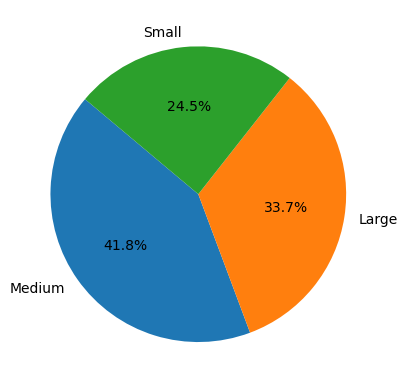

In [220]:
data1=data.groupby("company_size").salary_in_usd.mean().sort_values(ascending=False)
plt.pie(data1,labels=data1.index, autopct='%1.1f%%', startangle=140)
plt.show()


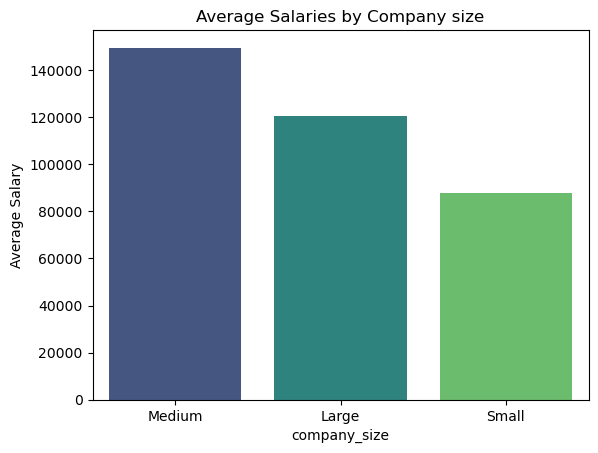

In [160]:
data1=data.groupby("company_size").salary_in_usd.mean().sort_values(ascending=False)
plt.xlabel("Company Size")
plt.ylabel("Average Salary")
plt.title("Average Salaries by Company size")
sns.barplot(x=data1.index,y=data1.values,palette='viridis')
plt.show()

# 10: Average salaries of work year in USD

In [159]:
data.groupby("work_year").salary_in_usd.mean()

work_year
1970-01-01 00:00:00.000002020    102250.866667
1970-01-01 00:00:00.000002021     99501.287037
1970-01-01 00:00:00.000002022    131788.543165
1970-01-01 00:00:00.000002023    150791.420757
1970-01-01 00:00:00.000002024    153124.084063
Name: salary_in_usd, dtype: float64

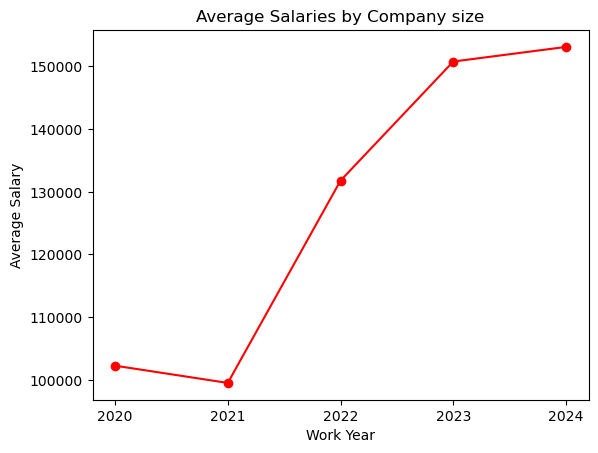

In [188]:
data1=data.groupby("work_year").salary_in_usd.mean()
plt.xlabel("Work Year")
plt.ylabel("Average Salary")
plt.title("Average Salaries by Company size")
plt.plot(data1.index,data1.values, marker='o', color='r')
plt.xticks(data1.index,labels=["2020","2021","2022","2023","2024"])
plt.show()